In [1]:
import numpy as np
import pandas as pd
import acquire
import prepare
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

## Decision Tree Exercises

### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following

In [2]:
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
train, validate, test = prepare.my_train_test_split(prepare.prep_titanic(df), target = 'survived')

In [4]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,is_male,embark_town_Queenstown,embark_town_Southampton
583,583,0,1,male,0,0,40.1250,Cherbourg,1,1,0,0
165,165,1,3,male,0,2,20.5250,Southampton,0,1,0,1
50,50,0,3,male,4,1,39.6875,Southampton,0,1,0,1
259,259,1,2,female,0,1,26.0000,Southampton,0,0,0,1
306,306,1,1,female,0,0,110.8833,Cherbourg,1,0,0,0


In [5]:
# drop out non-numerical columns or non-encoded version remaining in this data set
drops = ['sex', 'embark_town', 'passenger_id']

In [6]:
[dataset.drop(columns=drops, inplace=True) for dataset in [train, validate, test]]

[None, None, None]

In [7]:
train.columns, validate.columns

(Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'is_male',
        'embark_town_Queenstown', 'embark_town_Southampton'],
       dtype='object'),
 Index(['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone', 'is_male',
        'embark_town_Queenstown', 'embark_town_Southampton'],
       dtype='object'))

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [8]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [9]:
baseline_accuracy = (train.survived == 0).mean()
print(f'The baseline accuracy is {baseline_accuracy * 100}%')

The baseline accuracy is 61.64658634538153%


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [10]:
x_train = train.drop(columns='survived')
y_train = train.survived

In [11]:
x_train.head()

,pclass,sibsp,parch,fare,alone,is_male,embark_town_Queenstown,embark_town_Southampton
583,1,0,0,40.1250,1,1,0,0
165,3,0,2,20.5250,0,1,0,1
50,3,4,1,39.6875,0,1,0,1
259,2,0,1,26.0000,0,0,0,1
306,1,0,0,110.8833,1,0,0,0


In [12]:
y_train.head()

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [13]:
# make the thing
model1 = DecisionTreeClassifier(max_depth=2, random_state=123)
# fit the thing
model1.fit(x_train, y_train)
# use the thing

DecisionTreeClassifier(max_depth=2, random_state=123)

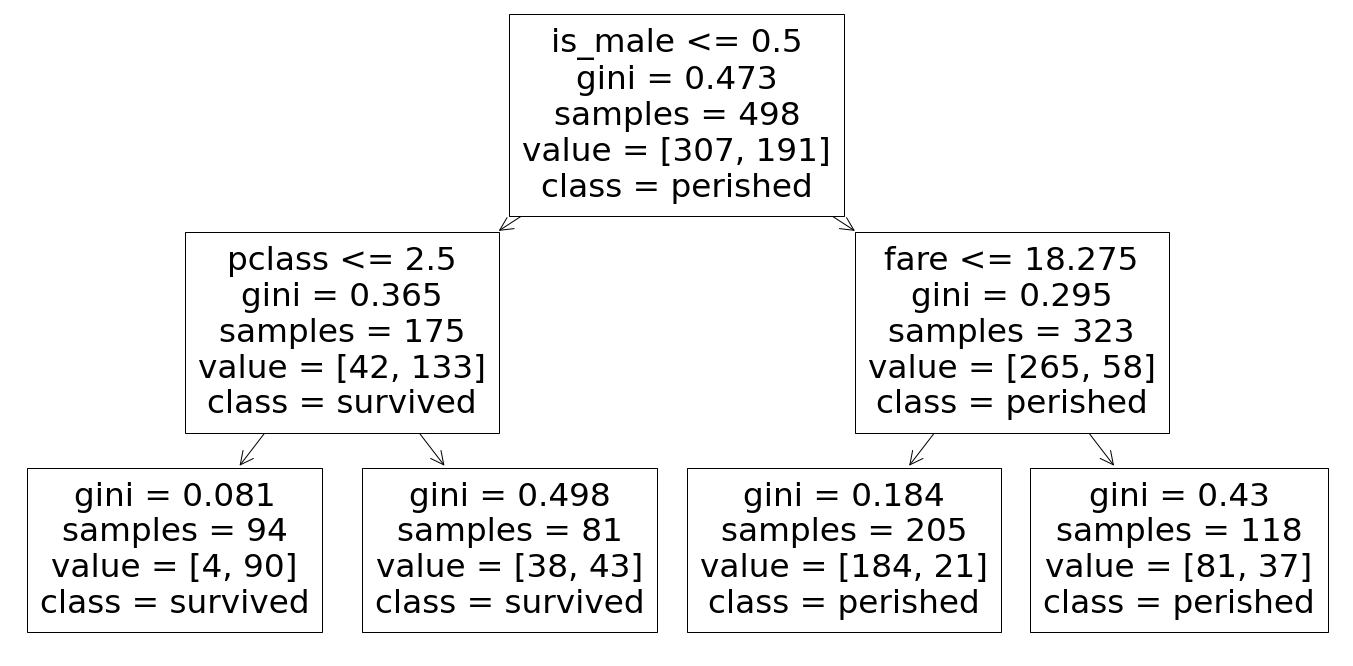

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=x_train.columns.to_list(), class_names=['perished', 'survived']);

In [15]:
y_pred = model1.predict(x_train)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [16]:
y_preds = pd.DataFrame(
{
    'y_actual': y_train.values,
    'baseline': 0,
    'model_1': model1.predict(x_train)
})
y_preds

,y_actual,baseline,model_1
0,0,0,0
1,1,0,0
2,0,0,0
3,1,0,1
4,1,0,1
...,...,...,...
493,0,0,0
494,0,0,0
495,0,0,0
496,0,0,1


In [17]:
(y_preds.y_actual == y_preds.baseline).mean()

0.6164658634538153

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [18]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(model1.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [19]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[265,  42],
       [ 58, 133]])

In [20]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [21]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(model1.score(x_train, y_train)))
print()
print(confusion_matrix(y_train, y_pred))
print()
print(classification_report(y_train, y_pred))

Accuracy of Decision Tree classifier on training set: 0.80

[[265  42]
 [ 58 133]]

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



In [22]:
print(f'Positive is defined as not surviving; Negative is defined as surviving')
true_positive_count = confusion_matrix(y_train, y_pred)[0][0]
print(f'True positives: {true_positive_count}')
false_negative_count = confusion_matrix(y_train, y_pred)[1][0]
print(f'False negatives: {false_negative_count}')
false_positive_count = confusion_matrix(y_train, y_pred)[0][1]
print(f'False positives: {false_positive_count}')
true_negative_count = confusion_matrix(y_train, y_pred)[1][1]
print(f'True negatives: {true_negative_count}')

Positive is defined as not surviving; Negative is defined as surviving
True positives: 265
False negatives: 58
False positives: 42
True negatives: 133


### 5. Run through steps 2-4 using a different max_depth value.

In [23]:
# make the thing
model2 = DecisionTreeClassifier(max_depth=7, random_state=123)
# fit the thing
model2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=123)

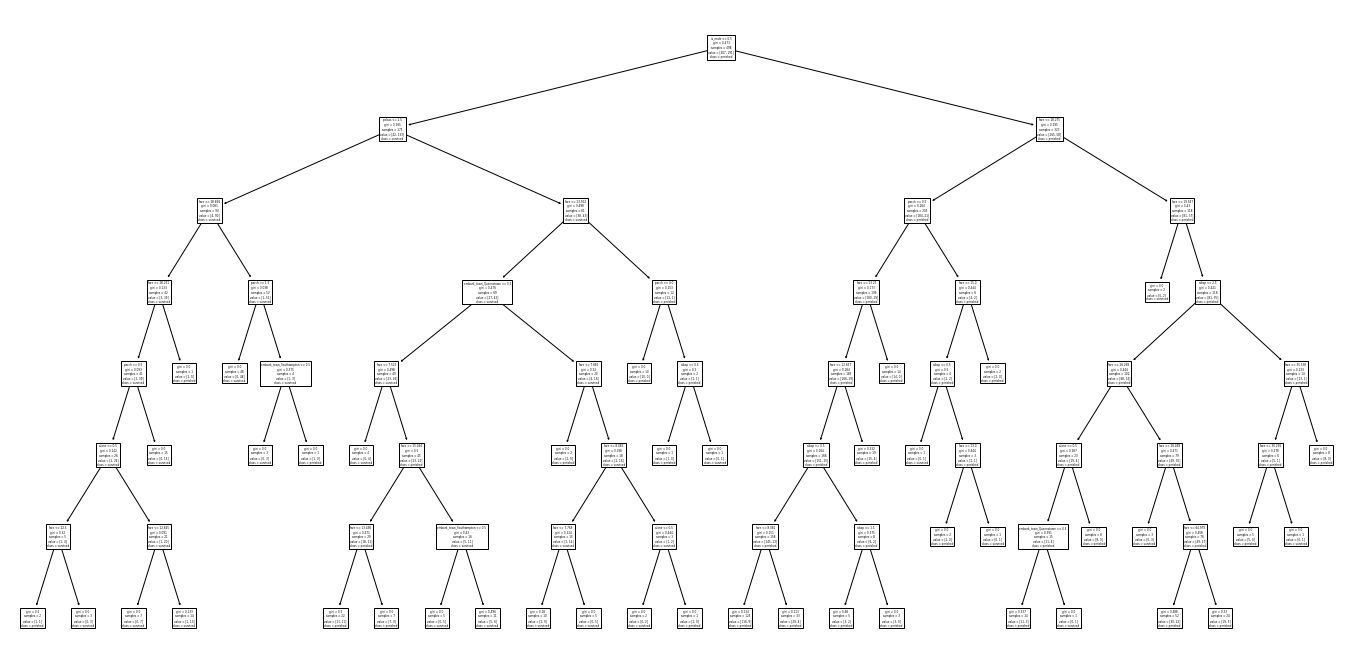

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plot_tree(model2, feature_names=x_train.columns.to_list(), class_names=['perished', 'survived']);

In [25]:
y_pred_2 = model2.predict(x_train)
y_pred_2

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(model2.score(x_train, y_train)))
print()
print(confusion_matrix(y_train, y_pred_2))
print()
print(classification_report(y_train, y_pred_2))

Accuracy of Decision Tree classifier on training set: 0.86

[[300   7]
 [ 61 130]]

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       307
           1       0.95      0.68      0.79       191

    accuracy                           0.86       498
   macro avg       0.89      0.83      0.85       498
weighted avg       0.88      0.86      0.86       498



### 6. Which model performs better on your in-sample data?

In [27]:
# accuracy performance on model1 to model2 (on train)
model1.score(x_train, y_train), model2.score(x_train, y_train)

(0.7991967871485943, 0.8634538152610441)

### 7. Which model performs best on your out-of-sample data, the validate set?

In [28]:
x_val, y_val = validate.drop(columns='survived'), validate.survived

In [29]:
# accuracy performance on model1 to model2 (on validate)
model1.score(x_val, y_val), model2.score(x_val, y_val)

(0.7616822429906542, 0.7616822429906542)

## Random Forest Exercises

In [30]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


### Continue working in your model file with titanic data to do the following:

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [31]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [32]:
y_pred = rf.predict(x_train)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [33]:
rf.score(x_train, y_train)

0.9437751004016064

In [34]:
cm = confusion_matrix(y_train, y_pred)

In [35]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       307
           1       0.97      0.88      0.92       191

    accuracy                           0.94       498
   macro avg       0.95      0.93      0.94       498
weighted avg       0.94      0.94      0.94       498



### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [36]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.94


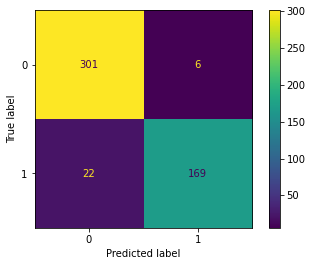

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

In [38]:
conf = confusion_matrix(y_train, y_pred)

In [39]:
rubric_df = pd.DataFrame({
    'pred_death': ['True Negative', 'False Negative'],
    'pred_survive':['False Positive','True Positive']
    }, index=['actual_death', 'actual_survive'])

In [40]:
rubric_df + ': ' + conf.astype(str)

,pred_death,pred_survive
actual_death,True Negative: 301,False Positive: 6
actual_survive,False Negative: 22,True Positive: 169


In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       307
           1       0.97      0.88      0.92       191

    accuracy                           0.94       498
   macro avg       0.95      0.93      0.94       498
weighted avg       0.94      0.94      0.94       498



### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [42]:
metrics = []
max_depth = 11

for i in range(1, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(x_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(x_train, y_train)
    
    out_of_sample_accuracy = forest.score(x_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,10,0.943775,0.785047,0.158728
1,2,9,0.899598,0.799065,0.100533
2,3,8,0.887550,0.799065,0.088485
3,4,7,0.861446,0.803738,0.057707
4,5,6,0.835341,0.808411,0.026930
5,6,5,0.829317,0.794393,0.034925
6,7,4,0.829317,0.794393,0.034925
7,8,3,0.825301,0.775701,0.049600
8,9,2,0.795181,0.771028,0.024153
9,10,1,0.795181,0.766355,0.028826


### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [43]:
# having min samples per leaf = 1 and max_depth = 10 
# is best for in-sample data but has a big drop off for validate.

### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [44]:
# having min samples per leaf = 5 and max_depth = 6 
# while it does not have the closest metrics does provide us 
# with a above 80% accuracy for both in-sample and out of sample data.

## KNN EXERCISES

In [45]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,is_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,0,0,40.1250,1,1,0,0
165,1,3,0,2,20.5250,0,1,0,1
50,0,3,4,1,39.6875,0,1,0,1
259,1,2,0,1,26.0000,0,0,0,1
306,1,1,0,0,110.8833,1,0,0,0


In [47]:
x_train = train.drop(columns=['survived','parch','fare','alone','embark_town_Queenstown','embark_town_Southampton'])
y_train = train.survived

In [48]:
x_val = validate.drop(columns=['survived','parch','fare','alone','embark_town_Queenstown','embark_town_Southampton'])
y_val = validate.survived

In [49]:
x_test = test.drop(columns=['survived','parch','fare','alone','embark_town_Queenstown','embark_town_Southampton'])
y_test = test.survived

In [50]:
x_train

,pclass,sibsp,is_male
583,1,0,1
165,3,0,1
50,3,4,1
259,2,0,0
306,1,0,0
...,...,...,...
313,3,0,1
636,3,0,1
222,3,0,1
485,3,3,0


#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [51]:
# Create KNN Object
knn = KNeighborsClassifier(n_neighbors=5)

In [52]:
# Fit the model to the training data.
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [53]:
# Make Predictions
y_pred = knn.predict(x_train)

In [54]:
# Estimate Probability
y_pred_proba = knn.predict_proba(x_train)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [55]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))

print(confusion_matrix(y_train, y_pred))

print(classification_report(y_train, y_pred))

Accuracy of KNN classifier on training set: 0.82
[[267  40]
 [ 52 139]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       307
           1       0.78      0.73      0.75       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.80       498
weighted avg       0.81      0.82      0.81       498



#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [56]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(139, 267, 40, 52)

In [57]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8152610441767069
True Positive Rate: 0.7277486910994765
False Positive Rate: 0.13029315960912052
True Negative Rate: 0.8697068403908795
False Negative Rate: 0.27225130890052357
Precision: 0.776536312849162
Recall: 0.7277486910994765
F1 Score: 0.7513513513513513
Support (0): 191
Support (1): 307


#### 4. Run through steps 2-4 setting k to 10

In [58]:
# Create KNN Object
knn10 = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the training data.
knn10.fit(x_train, y_train)

# Make Predictions
y_pred10 = knn10.predict(x_train)

# Estimate Probability
y_pred_proba10 = knn10.predict_proba(x_train)

In [59]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn10.score(x_train, y_train)))

print(confusion_matrix(y_train, y_pred10))

print(classification_report(y_train, y_pred10))

Accuracy of KNN classifier on training set: 0.81
[[285  22]
 [ 71 120]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       307
           1       0.85      0.63      0.72       191

    accuracy                           0.81       498
   macro avg       0.82      0.78      0.79       498
weighted avg       0.82      0.81      0.81       498



In [60]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_train,y_pred10).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(120, 285, 22, 71)

In [61]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8132530120481928
True Positive Rate: 0.6282722513089005
False Positive Rate: 0.07166123778501629
True Negative Rate: 0.9283387622149837
False Negative Rate: 0.3717277486910995
Precision: 0.8450704225352113
Recall: 0.6282722513089005
F1 Score: 0.7207207207207207
Support (0): 191
Support (1): 307


#### 5. Run through setps 2-4 setting k to 20

In [62]:
# Create KNN Object
knn20 = KNeighborsClassifier(n_neighbors=20)

# Fit the model to the training data.
knn20.fit(x_train, y_train)

# Make Predictions
y_pred20 = knn20.predict(x_train)

# Estimate Probability
y_pred_proba20 = knn20.predict_proba(x_train)

In [63]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn20.score(x_train, y_train)))

print(confusion_matrix(y_train, y_pred20))

print(classification_report(y_train, y_pred20))

Accuracy of KNN classifier on training set: 0.81
[[285  22]
 [ 71 120]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       307
           1       0.85      0.63      0.72       191

    accuracy                           0.81       498
   macro avg       0.82      0.78      0.79       498
weighted avg       0.82      0.81      0.81       498



In [64]:
# We can create our own classification report with a bit more info
TN, FP, FN, TP = confusion_matrix(y_train,y_pred20).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(120, 285, 22, 71)

In [65]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.8132530120481928
True Positive Rate: 0.6282722513089005
False Positive Rate: 0.07166123778501629
True Negative Rate: 0.9283387622149837
False Negative Rate: 0.3717277486910995
Precision: 0.8450704225352113
Recall: 0.6282722513089005
F1 Score: 0.7207207207207207
Support (0): 191
Support (1): 307


#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [66]:
print("KNN (k = 5)")
print(classification_report(y_train, y_pred))
print("KNN (k = 10)")
print(classification_report(y_train, y_pred10))
print("KNN (k = 20)")
print(classification_report(y_train, y_pred20))
print(knn.score(x_train, y_train), knn10.score(x_train, y_train), knn20.score(x_train, y_train))

KNN (k = 5)
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       307
           1       0.78      0.73      0.75       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.80       498
weighted avg       0.81      0.82      0.81       498

KNN (k = 10)
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       307
           1       0.85      0.63      0.72       191

    accuracy                           0.81       498
   macro avg       0.82      0.78      0.79       498
weighted avg       0.82      0.81      0.81       498

KNN (k = 20)
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       307
           1       0.85      0.63      0.72       191

    accuracy                           0.81       498
   macro avg       0.82      0.78      0.79       498
weighted avg       0.82      0.81   

In [67]:
# As k increases, performance in both accuracy and f1 score on the training data set decrease
# This is likely do to overfitting when k is small
# When k is small, the model will rely more heavily on small variations in the training data set
# While this will improve train performance, it will likely result in a model that is overfit and performs worse on out-of-sample data

#### 7. Which model performs best on our out-of-sample data from validate?

In [68]:
knn.score(x_val, y_val), knn10.score(x_val, y_val), knn20.score(x_val, y_val)

(0.7663551401869159, 0.7757009345794392, 0.7757009345794392)

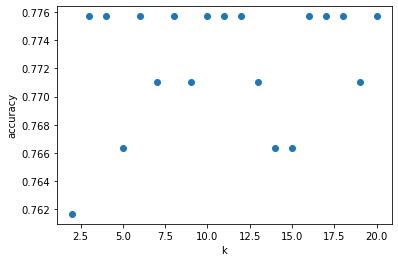

In [69]:
import matplotlib.pyplot as plt
k_range = range(2, 21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_val, y_val))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.show()

Having the number of neighbors equal 5 gives us the most accurate model  for both in and out of sample data. We can try new models with different and/or additional features to try and make more accurate models.

## Logistic Regression

In [70]:
import numpy as np
import pandas as pd
import math
# to get logistic regression, grab LogisticRegression from linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### 1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [71]:
df = acquire.get_titanic_data()
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [72]:
# filling in NaNs with the mode of the age column.
df['age'].fillna(value=df['age'].median(), inplace=True)

In [73]:
df['is_male'] = df.sex.map({'male': 1, 'female': 0})

In [74]:
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,is_male
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,0
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1,0
888,888,0,3,female,28.0,1,2,23.4500,S,Third,NaN,Southampton,0,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1,1


In [75]:
train, validate, test = prepare.my_train_test_split(df, target='survived')
train.shape, validate.shape, test.shape

((498, 14), (214, 14), (179, 14))

In [76]:
train.survived.value_counts(normalize=True)

0    0.616466
1    0.383534
Name: survived, dtype: float64

In [77]:
# Split the datasets
# Separate out our X and y values
X_train, y_train = train.drop(columns='survived'), train.survived
X_validate, y_validate = validate.drop(columns='survived'), validate.survived
X_test, y_test = test.drop(columns='survived'), test.survived

In [78]:
dropcols = ['embarked', 'class','embark_town','sex']

In [79]:
X_train = X_train.drop(columns=['embarked', 'class','embark_town','sex'])

In [80]:
X_validate, X_test = X_validate.drop(columns=dropcols), X_test.drop(columns=dropcols)

In [81]:
baseline_accuracy = (train.survived == 0).mean()
print(f'The baseline accuracy is {baseline_accuracy * 100}%')

The baseline accuracy is 61.64658634538153%


In [82]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
selected_feats = ['age', 'pclass', 'fare']

# Fit a model using only these specified features
logit.fit(X_train[selected_feats], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[selected_feats])

In [83]:
# This model does perform better than baseline.
baseline_accuracy = (train.survived == 0).mean()
print(f'The baseline accuracy is {baseline_accuracy * 100}%')

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[selected_feats], y_train)))

The baseline accuracy is 61.64658634538153%
Accuracy of Logistic Regression classifier on training set: 0.70


## 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [84]:
# Create the logistic regression
logit1 = LogisticRegression(random_state=123)

# specify the features we're using
features = ['age', 'fare', 'pclass', 'is_male']

# Fit a model using only these specified features
logit1.fit(X_train[features], y_train)

y_pred = logit1.predict(X_train[features])

print("Logistic Regression using age, pclass, fare, and gender features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train[features], y_train)))

Logistic Regression using age, pclass, fare, and gender features
Accuracy of Logistic Regression classifier on training set: 0.81


## 3. Try out other combinations of features and models.

In [85]:
# Only Age 
logit2 = LogisticRegression(random_state=123)
logit2.fit(X_train[['age']], y_train)
accuracy = logit2.score(X_train[['age']], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.62


In [86]:
# Only Class
logit3 = LogisticRegression(random_state=123)
logit3.fit(X_train[['pclass']], y_train)
accuracy = logit3.score(X_train[['pclass']], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

All Features and we're setting the class_weight hyperparameter
Accuracy of Logistic Regression classifier on training set: 0.67


## 4. Use you best 3 models to predict and evaluate on your validate sample.

In [87]:
logit.score(X_validate[selected_feats], y_validate)

0.7102803738317757

In [88]:
logit1.score(X_validate[features], y_validate)

0.780373831775701

In [89]:
logit3.score(X_validate[['pclass']], y_validate)

0.6869158878504673

## 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [90]:
print(f'Test score {logit1.score(X_test[features], y_test)}')
print(f'Validate score {logit1.score(X_validate[features], y_validate)}')
print(f'Train score {logit1.score(X_train[features], y_train)}')

Test score 0.7988826815642458
Validate score 0.780373831775701
Train score 0.8072289156626506
